# MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Exploring the format of the MNIST fashion data set

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

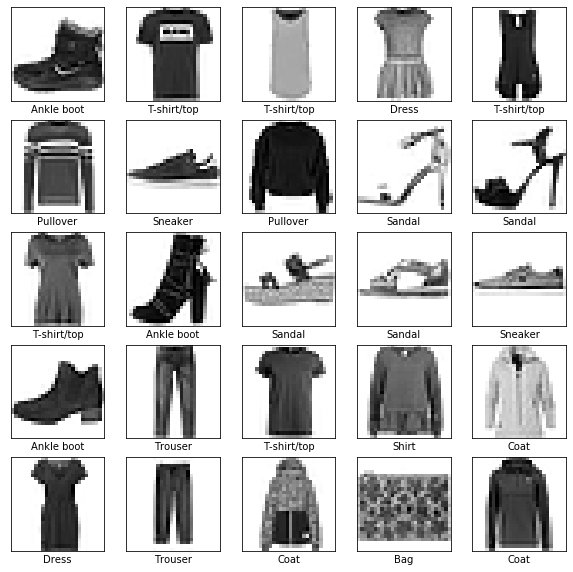

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

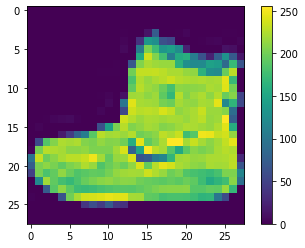

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the models

In [0]:
#Other Model

epochs = 15

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

fit_model = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 109us/sample - loss: 0.5373 - acc: 0.8091 - val_loss: 0.4138 - val_acc: 0.8535
Epoch 2/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4076 - acc: 0.8526 - val_loss: 0.3917 - val_acc: 0.8559
Epoch 3/15
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3748 - acc: 0.8649 - val_loss: 0.3811 - val_acc: 0.8616
Epoch 4/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3535 - acc: 0.8709 - val_loss: 0.3594 - val_acc: 0.8711
Epoch 5/15
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3393 - acc: 0.8749 - val_loss: 0.3593 - val_acc: 0.8668
Epoch 6/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3285 - acc: 0.8797 - val_loss: 0.3511 - val_acc: 0.8741
Epoch 7/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3191 - acc: 0.8832 - val_loss: 0

In [0]:
#Overfit Model
overfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation=tf.nn.elu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.elu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

overfit_model = overfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4939 - acc: 0.8198 - val_loss: 0.4157 - val_acc: 0.8487
Epoch 2/15
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3835 - acc: 0.8590 - val_loss: 0.4039 - val_acc: 0.8530
Epoch 3/15
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3528 - acc: 0.8688 - val_loss: 0.3660 - val_acc: 0.8674
Epoch 4/15
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3333 - acc: 0.8762 - val_loss: 0.3695 - val_acc: 0.8633
Epoch 5/15
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3122 - acc: 0.8833 - val_loss: 0.3890 - val_acc: 0.8689
Epoch 6/15
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2965 - acc: 0.8885 - val_loss: 0.3507 - val_acc: 0.8799
Epoch 7/15
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2850 - acc: 0.8928 - val_los

In [0]:
#Underfit Model

underfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

underfit_model = underfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 110us/sample - loss: 1.5322 - acc: 0.3832 - val_loss: 1.0899 - val_acc: 0.5738
Epoch 2/15
60000/60000 [==============================] - 6s 92us/sample - loss: 0.9525 - acc: 0.6536 - val_loss: 0.9052 - val_acc: 0.6663
Epoch 3/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.8583 - acc: 0.6849 - val_loss: 0.8473 - val_acc: 0.6939
Epoch 4/15
60000/60000 [==============================] - 6s 95us/sample - loss: 0.8205 - acc: 0.6965 - val_loss: 0.8364 - val_acc: 0.6943
Epoch 5/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.7999 - acc: 0.7002 - val_loss: 0.8055 - val_acc: 0.7027
Epoch 6/15
60000/60000 [==============================] - 6s 97us/sample - loss: 0.7852 - acc: 0.7055 - val_loss: 0.8150 - val_acc: 0.6943
Epoch 7/15
60000/60000 [==============================] - 6s 95us/sample - loss: 0.7745 - acc: 0.7092 - val_loss: 0

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

test_loss, test_acc = underfit.evaluate(test_images, test_labels)

print('Test accuracy for underfit:', test_acc)

test_loss, test_acc = overfit.evaluate(test_images, test_labels)

print('Test accuracy for overfit:', test_acc)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3267 - acc: 0.8842
Test accuracy: 0.8842
10000/10000 [==============================] - 1s 70us/sample - loss: 0.7609 - acc: 0.7204
Test accuracy for underfit: 0.7204
10000/10000 [==============================] - 1s 66us/sample - loss: 0.3772 - acc: 0.8845
Test accuracy for overfit: 0.8845


## Training/test loss/accuracy during training

In [0]:
history_dict = fit_model.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

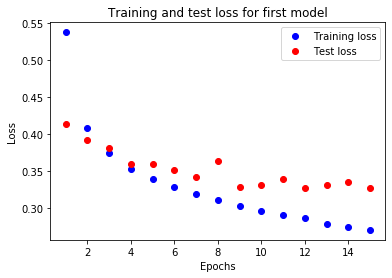

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss for first model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

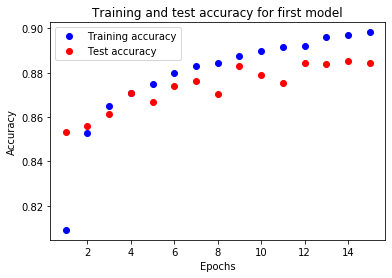

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy for first model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
history_dict = overfit_model.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

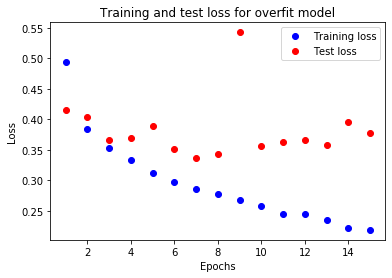

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss for overfit model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

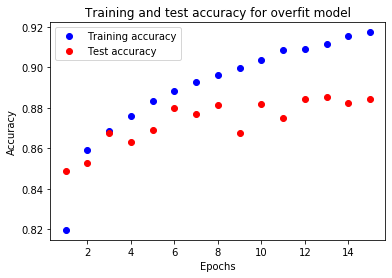

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy for overfit model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
history_dict = underfit_model.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

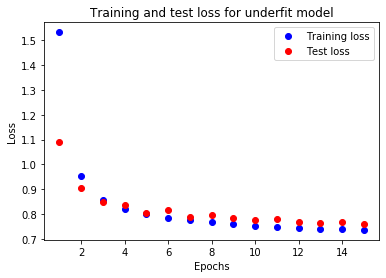

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss for underfit model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

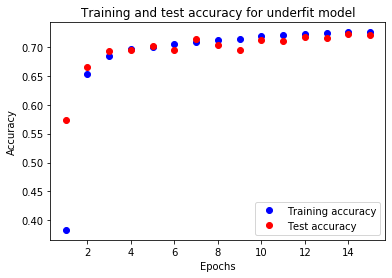

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy for underfit model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()